# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
This dataset represents 17 marketing campaigns that occurred between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business Objective

<mark>The business objective is to predict the effectiveness of direct phone campaign by a bank for the subscription of term deposit by its customers based on the data from multiple bank's previous direct product marketing campaigns over the phone.</mark> 

The direct phone campaign data contains campaign features such as <b>phone contact communication type, last contact day of the week, last contact month of the year, and last contact duration, number of times client was contacted for the campaign, number of times client was contacted before the campaign, days passed since client was last contacted for the previous campaign, outcome of the previous campaign, and has the client subscribed to term deposit</b>.

In order to achieve the business objective, we are tasked to compare the performance of different classification models (Logistic Regression, Decision Trees, K-Nearest Neighbors, and Support Vector Machines) when used with the direct phone marketing campaign data and pick the best performing model based on highest accuracy and precision.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [5]:
campaign_features = ['contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','y']
campaign_df = df[campaign_features]
campaign_df

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,telephone,may,mon,261,1,999,0,nonexistent,no
1,telephone,may,mon,149,1,999,0,nonexistent,no
2,telephone,may,mon,226,1,999,0,nonexistent,no
3,telephone,may,mon,151,1,999,0,nonexistent,no
4,telephone,may,mon,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...
41183,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,cellular,nov,fri,442,1,999,0,nonexistent,yes


In [6]:
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   contact      41188 non-null  object
 1   month        41188 non-null  object
 2   day_of_week  41188 non-null  object
 3   duration     41188 non-null  int64 
 4   campaign     41188 non-null  int64 
 5   pdays        41188 non-null  int64 
 6   previous     41188 non-null  int64 
 7   poutcome     41188 non-null  object
 8   y            41188 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.8+ MB


In [7]:
campaign_df.describe()

,duration,campaign,pdays,previous
count,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,962.475454,0.172963
std,259.279249,2.770014,186.910907,0.494901
min,0.000000,1.000000,0.000000,0.000000
25%,102.000000,1.000000,999.000000,0.000000
50%,180.000000,2.000000,999.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000
max,4918.000000,56.000000,999.000000,7.000000


In [8]:
campaign_df.isna().sum()

contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [9]:
last_contact_duration0_df = campaign_df.query('duration == 0')
last_contact_duration0_df['y'].value_counts()

y
no    4
Name: count, dtype: int64

In [10]:
last_contact_duration0_df

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
6251,telephone,may,tue,0,4,999,0,nonexistent,no
23031,cellular,aug,tue,0,10,999,0,nonexistent,no
28063,cellular,apr,fri,0,3,999,0,nonexistent,no
33015,cellular,may,mon,0,2,999,0,nonexistent,no


In [11]:
# Remove the records with last contact duration as zero
campaign_df = campaign_df.query('duration > 0')
campaign_df

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,telephone,may,mon,261,1,999,0,nonexistent,no
1,telephone,may,mon,149,1,999,0,nonexistent,no
2,telephone,may,mon,226,1,999,0,nonexistent,no
3,telephone,may,mon,151,1,999,0,nonexistent,no
4,telephone,may,mon,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...
41183,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,cellular,nov,fri,442,1,999,0,nonexistent,yes


In [12]:
print(f"Record count for client not previously contacted: {len(campaign_df.query('pdays == 999'))}")

Record count for client not previously contacted: 39669


In [13]:
print("Non-numerical Features:")
count=0
for column_name in campaign_df:
    if campaign_df[column_name].dtype == 'object':
        count = count+1
        print(f"{count} Feature Name: {column_name}")
        unique_values = campaign_df[column_name].unique()
        if len(unique_values) < 51:
            print(f"Unique values of {column_name}: {unique_values}")
        else:
            print(f"Unique values of {column_name} are more than 50")

Non-numerical Features:
1 Feature Name: contact
Unique values of contact: ['telephone' 'cellular']
2 Feature Name: month
Unique values of month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
3 Feature Name: day_of_week
Unique values of day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
4 Feature Name: poutcome
Unique values of poutcome: ['nonexistent' 'failure' 'success']
5 Feature Name: y
Unique values of y: ['no' 'yes']


### Visualizating the data for better feature understanding

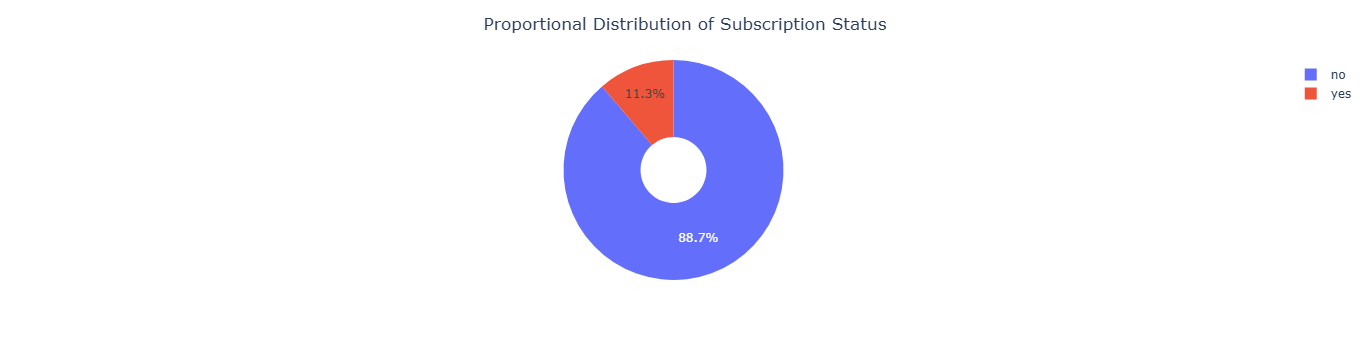

In [64]:
# Proportional Distribution of Subscription Status
sub_counts = campaign_df['y'].value_counts()
sub_counts_df = pd.DataFrame(sub_counts).reset_index()
sub_counts_df.columns = ['Subscription Status', 'Count']

fig = px.pie(sub_counts_df, values='Count', names='Subscription Status', width=550, hole=0.3) # Optional: Add a hole for a donut chart effect
fig.update_layout(title={'text': 'Proportional Distribution of Subscription Status','x': 0.5,'xanchor': 'center'})
fig.write_image("images/01_Proportional_Distribution_of_Subscription_Status.png")
fig.write_html("plots/01_Proportional_Distribution_of_Subscription_Status.html")
fig.show()

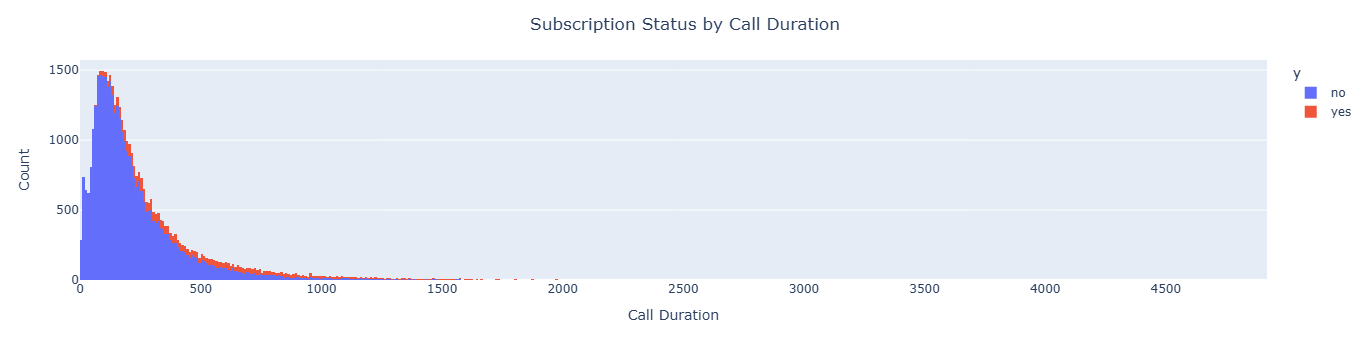

In [65]:
# Subscription Status breakdown by Call Duration
fig = px.histogram(campaign_df, x='duration', color='y')
fig.update_layout(title={'text': 'Subscription Status by Call Duration','x': 0.5,'xanchor': 'center'},
                 xaxis_title_text='Call Duration', yaxis_title_text='Count')
fig.write_image("images/02_Subscription_Status_by_Call_Duration.png")
fig.write_html("plots/02_Subscription_Status_by_Call_Duration.html")
fig.show()

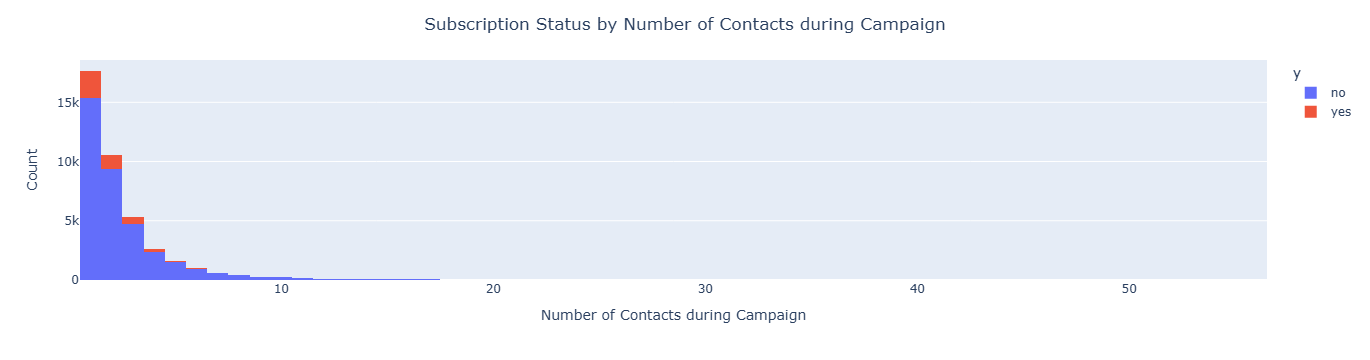

In [66]:
# Subscription Status breakdown by Number of Contacts during Campaign
fig = px.histogram(campaign_df, x='campaign', color='y')
fig.update_layout(title={'text': 'Subscription Status by Number of Contacts during Campaign','x': 0.5,'xanchor': 'center'},
                 xaxis_title_text='Number of Contacts during Campaign', yaxis_title_text='Count')
fig.write_image("images/03_Subscription_Status_by_Number_of_Contacts_during_Campaign.png")
fig.write_html("plots/03_Subscription_Status_by_Number_of_Contacts_during_Campaign.html")
fig.show()

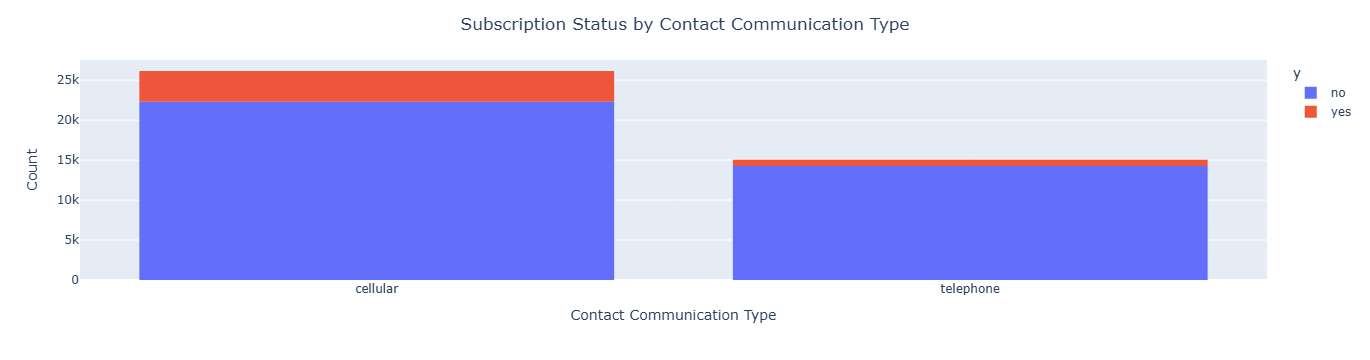

In [67]:
# Subscription Status breakdown by Contact Communication Type
fig = px.histogram(campaign_df, x='contact', color='y', width=650)
fig.update_layout(title={'text': 'Subscription Status by Contact Communication Type','x': 0.5,'xanchor': 'center'},
                 xaxis_title_text='Contact Communication Type', yaxis_title_text='Count', xaxis={'categoryorder':'total descending'})
fig.write_image("images/04_Subscription_Status_by_Contact_Communication_Type.png")
fig.write_html("plots/04_Subscription_Status_by_Contact_Communication_Type.html")
fig.show()

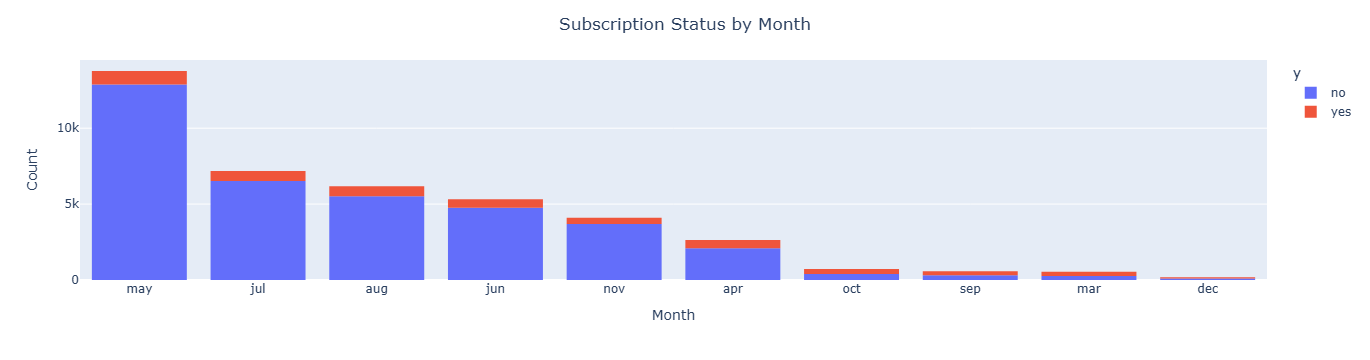

In [68]:
# Subscription Status breakdown by Month
fig = px.histogram(campaign_df, x='month', color='y')
fig.update_layout(title={'text': 'Subscription Status by Month','x': 0.5,'xanchor': 'center'},
                 xaxis_title_text='Month', yaxis_title_text='Count', xaxis={'categoryorder':'total descending'})
fig.write_image("images/05_Subscription_Status_by_Month.png")
fig.write_html("plots/05_Subscription_Status_by_Month.html")
fig.show()

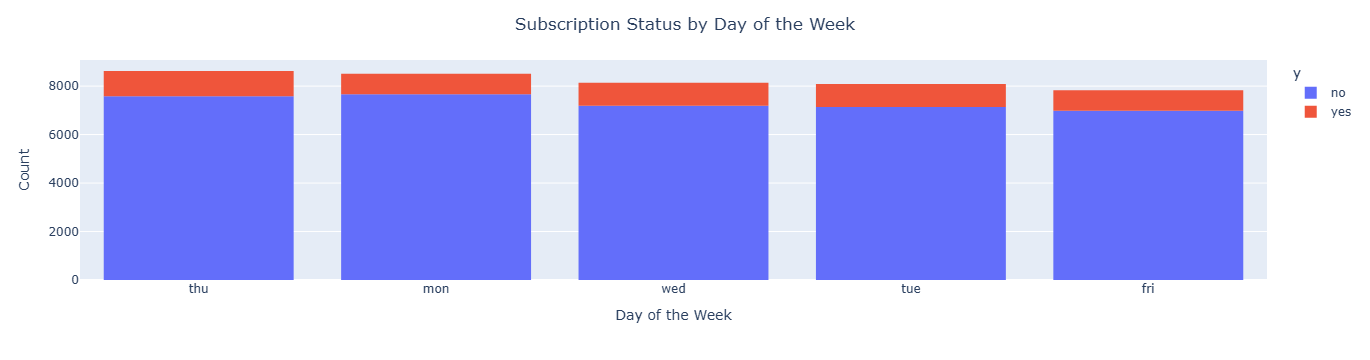

In [69]:
# Subscription Status breakdown by Day of the Week
fig = px.histogram(campaign_df, x='day_of_week', color='y', width=900)
fig.update_layout(title={'text': 'Subscription Status by Day of the Week','x': 0.5,'xanchor': 'center'},
                 xaxis_title_text='Day of the Week', yaxis_title_text='Count', xaxis={'categoryorder':'total descending'})
fig.write_image("images/06_Subscription_Status_by_Day_of_the_Week.png")
fig.write_html("plots/06_Subscription_Status_by_Day_of_the_Week.html")
fig.show()

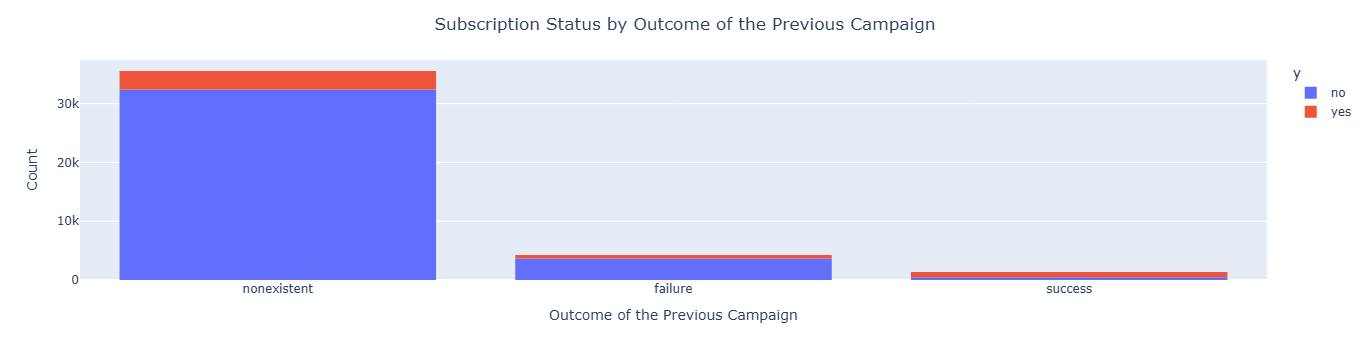

In [70]:
# Subscription Status breakdown by Outcome of the Previous Campaign 
fig = px.histogram(campaign_df, x='poutcome', color='y', width=600)
fig.update_layout(title={'text': 'Subscription Status by Outcome of the Previous Campaign','x': 0.5,'xanchor': 'center'},
                 xaxis_title_text='Outcome of the Previous Campaign', yaxis_title_text='Count', xaxis={'categoryorder':'total descending'})
fig.write_image("images/07_Subscription_Status_by_Outcome_of_the_Previous_Campaign.png")
fig.write_html("plots/07_Subscription_Status_by_Outcome_of_the_Previous_Campaign.html")
fig.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Creating the datasets for modeling
y = campaign_df['y']
X = campaign_df.drop('y', axis=1)

# Splitting the date into Training Set and Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=.3)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [37]:
campaign_df['y'].value_counts()

y
no     36544
yes     4640
Name: count, dtype: int64

In [56]:
yes = 4640/41184
no = 36544/41184
print(f"Percentage of y=yes: {yes}")
print(f"Percentage of y=no: {no}")

Percentage of y=yes: 0.11266511266511267
Percentage of y=no: 0.8873348873348873


##### Majority Class (Zero Rule / ZeroR): This strategy always predicts the most frequent label in the training set.

Most frequent label in our dataset = 'no' with 88.73%. So, we should be looking for <mark><b>Accuracy > 88%</b></mark>, but we have class imbalance with only 11% 'yes'.

##### <mark>Therefore the baseline performance should also be measured using  <b>F1-Score / Precision-Recall</b></mark>

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
numeric_features = ['duration','campaign','pdays','previous']
categorical_features = ['contact','month','day_of_week','poutcome']

# Create preprocessor
preprocessor = ColumnTransformer(transformers = [("numeric", StandardScaler(), numeric_features), ("catigorical", OneHotEncoder(), categorical_features)])

# Create pipeline with preprocessor and Logistic Regression model
pipeline = Pipeline([("prepocessor", preprocessor), ("model", LogisticRegression(class_weight = "balanced", max_iter = 1000, random_state=42))])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prepocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('numeric', ...), ('catigorical', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different tran

### Problem 9: Score the Model

What is the accuracy of your model?

In [53]:
# Predict using test data
y_predict = pipeline.predict(X_test)

# Generate Classification Report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          no       0.97      0.86      0.91     10964
         yes       0.41      0.79      0.54      1392

    accuracy                           0.85     12356
   macro avg       0.69      0.82      0.73     12356
weighted avg       0.91      0.85      0.87     12356



In [54]:
# Generate Confusion Matrix
confusion_matrix(y_test, y_predict)

array([[9390, 1574],
       [ 292, 1100]])

<mark><b>Accuracy of our simple model (Logistic Regression) is 85%</b></mark>. We were looking for 88%. 

As reported in the Classification Report above, <mark><b>the model has very high F1-Score / Precision-Recall</b></mark>.
- <b>Precision is 97%</b>
- <b>Recall is 86%</b>
- <b>F1-Score is 91%</b>

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import datasets
import time

In [96]:
# Create preprocessor
preprocessor1 = ColumnTransformer(transformers=[('numeric', StandardScaler(), numeric_features), ('catigorical', OneHotEncoder(), categorical_features)])

# Define the models
models = {
    'LogisticRegression': (LogisticRegression(class_weight = "balanced", max_iter = 1000, random_state=42)),
    'KNearestNeighbors': (KNeighborsClassifier()),
    'DecisionTreeClassifier': (DecisionTreeClassifier()),
    'SupportVectorClassifier': (SVC())
}

results = []

for name, (model) in models.items():
    # Create a pipeline with preprocessor and respective model
    pipeline = Pipeline([('preprocessor', preprocessor1), (name, model)])

    # Fit the model and time it
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    train_time = (time.time() - start_time)

    # Evaluate on training set
    y_train_pred = pipeline.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Evaluate on test sets
    y_test_pred = pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append the results
    results.append([name, train_time, train_accuracy, test_accuracy])

# Create and display the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df.set_index('Model', inplace=True)
print("Model Comparisons")
results_df

Model Comparisons


,Train Time,Train Accuracy,Test Accuracy
Model,,,
LogisticRegression,0.087131,0.849972,0.848980
KNearestNeighbors,0.029381,0.927987,0.900777
DecisionTreeClassifier,0.148724,0.995144,0.880787
SupportVectorClassifier,4.514066,0.915048,0.908223


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
# Create preprocessor
preprocessor2 = ColumnTransformer(transformers=[('numeric', StandardScaler(), numeric_features), ('catigorical', OneHotEncoder(), categorical_features)])

# Define the models with respective hyperparameters
models2 = {
    'LogisticRegression': (LogisticRegression(class_weight = "balanced", max_iter = 1000, random_state=42), {'LogisticRegression__C': [0.1, 1, 10]}),
    'KNearestNeighbors': (KNeighborsClassifier(), {'KNearestNeighbors__n_neighbors': [3, 5, 7]}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(), {'DecisionTreeClassifier__max_depth': [5, 10, 15]}),
    'SupportVectorClassifier': (SVC(), {'SupportVectorClassifier__C': [0.1, 1, 10], 'SupportVectorClassifier__kernel': ['linear', 'rbf']})
}

print("Model Comparisons with Hyperparameters and Grid Search")

results2 = []

for name2, (model2, params) in models2.items():
    print(f"Model: {name2} \t\t\t Hyperparameters: {params}")

    # Create a pipeline with preprocessor and respective model
    pipeline2 = Pipeline([('preprocessor', preprocessor2), (name2, model2)])

    # Perform grid search
    grid_search = GridSearchCV(pipeline2, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    train_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Evaluate on training and test sets
    train_accuracy = best_model.score(X_train, y_train)
    test_accuracy = best_model.score(X_test, y_test)
    
    # Append the results
    results2.append([name2, train_time, train_accuracy, test_accuracy])

# Create the results DataFrame
results_df2 = pd.DataFrame(results2, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df2.set_index('Model', inplace=True)
results_df2

Model Comparisons with Hyperparameters and Grid Search
Model: LogisticRegression 			 Hyperparameters: {'LogisticRegression__C': [0.1, 1, 10]}
Model: KNearestNeighbors 			 Hyperparameters: {'KNearestNeighbors__n_neighbors': [3, 5, 7]}
Model: DecisionTreeClassifier 			 Hyperparameters: {'DecisionTreeClassifier__max_depth': [5, 10, 15]}
Model: SupportVectorClassifier 			 Hyperparameters: {'SupportVectorClassifier__C': [0.1, 1, 10], 'SupportVectorClassifier__kernel': ['linear', 'rbf']}


,Train Time,Train Accuracy,Test Accuracy
Model,,,
LogisticRegression,0.869928,0.849972,0.848980
KNearestNeighbors,0.625277,0.923789,0.903124
DecisionTreeClassifier,0.103705,0.911544,0.908223
SupportVectorClassifier,40.406801,0.915048,0.908223


### Conclusion

Without hyperparameter tuning:
- K-Nearest Neighbors model took the least training time and had very high test accuracy (92%) and train accuracy (90%).
- Desision Trees Classifier model had the best train accuracy (99.5%) but lower test accuracy (88%).
- Support Vector Classifier model had the best test accuracy (90.8%), but took may more time in training as compared to other models.
- <b>Overall, without hyperparameters tuning <mark>K-Nearest Neighbors</mark> performed the best in terms of training time and accuracy (90%).</b>

Without hyperparameter tuning:
- All models except for Desision Trees Classifier, took more time for training without any gain in train or test accuracy.
- Desision Trees Classifier did not take any more time for training and its test accuracy improved (90.8%) but train accuracy decreased (91%).
- Support Vector Classifier model took extremely log time in training. The code reported 40 seconds but in reality it took about 5 minutes.
- <b>Overall, with hyperparameters tuning <mark>Desision Trees Classifier</mark> performed the best in terms of training time and accuracy (90.8%).</b>

##### Questions